<a href="https://colab.research.google.com/github/LizhuChen/customer_segments/blob/main/customer_segments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project! This is a revised veriosn of the project from Udacity Machine Learning Engineer Nanodegree. In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

>You are not necessary to answer the questions in English. 可以使用中文回答。

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Load the wholesale customers dataset
try:
    data = pd.read_csv("/content/gdrive/My Drive/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

“新鮮”，“牛奶”，“雜貨”，“冷凍”，“洗滌劑紙”和“熟食店”

In [ ]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. 
>Note: It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [ ]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [4,289,412]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,42786,286,471,1388,32,22
2,97,3605,12400,98,2970,62


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
* 顧客4，Fresh與平均值相比高出很多，介於75%和max之間，Milk與平均值差不多，Grocery也僅比平均值少一些，Frozen與平均值相比也高出許多，介於75%和max之間，Detergents_Paper低於平均值但介於50%到75%之間，Delicatessen與平均值相比高出很多，介於75%和max之間，整體來看在Fresh、Delicatessen、Frozen這三者的需求都很高，Milk、Grocery、Detergents_Paper與平均值相差不多，且都介於50%到75%之間，在這六類都有很大的需求，因此我推斷他為大型批發零售商。
* 顧客289，Fresh與平均值相比高出很多，介於75%和max之間，Milk、Grocery、Detergents_Paper和Delicatessen介於0%~25%之間，代表需求很低，Frozen也低於平均值，介於25%到50%之間，整體看來對於Fresh的需求很大量，Frozen的需求屬於正常，但在其他類別需求很低，因此我推斷他為新鮮食品販售市場。
* 顧客412，Fresh、Frozen和Delicatessen介於0%和25%之間，代表需求很低，Milk相較於平均值低一些，但介於50%到75%之間，Grocery與平均值相比高出很多，介於75%和max之間，Detergents_Paper和平均值差不多，介於50%和75%之間，整體看來對於Milk、Grocery和Detergents_Paper這三者的需求高於其它三類，因此我推斷他為咖啡館。


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, *is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some **proportional amount** of another category of products*? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [ ]:
# TODO: Iterate all six features
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

for feature in data.keys():
  # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
  new_data = data.drop(feature, axis=1)
  new_data_value = data[feature]

  # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
  # Set a random state.
  X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_value, test_size=0.25, random_state=42)

  # TODO: Create a decision tree regressor and fit it to the training set
  regressor = DecisionTreeRegressor(random_state=5)
  regressor.fit(X_train, y_train)

  # TODO: Report the score of the prediction using the testing set
  score = regressor.score(X_test, y_test)

  print(feature,":",score)

Fresh : -0.4554736278697598
Milk : 0.24088837687411246
Grocery : 0.690375935568545
Frozen : -0.28192655815224343
Detergents_Paper : 0.3304814183424202
Delicatessen : -2.5055461283111518


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

分別將每個種類都嘗試過並進行比較，得到各score為:
* Fresh : -0.4554736278697598
* Milk : 0.24088837687411246
* Grocery : 0.690375935568545
* Frozen : -0.28192655815224343
* Detergents_Paper : 0.3304814183424202
* Delicatessen : -2.5055461283111518

其中Grocery得到的score是最高的，而Fresh、Frozen和Delicatessen得到的score為負的，可以得知這三者較難透過其他特徵預測得知，屬於重要的特徵，而Milk和Detergents_Paper雖然為正的，但與Grocery的score相比較低，因此在識別客戶的消費習慣時，可以選擇刪除Grocery這個類別，因為可以透過其他特徵預測出來。

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix. See [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html) to understand how to use the scatter matrix method

'kde':對角線的內核密度估計

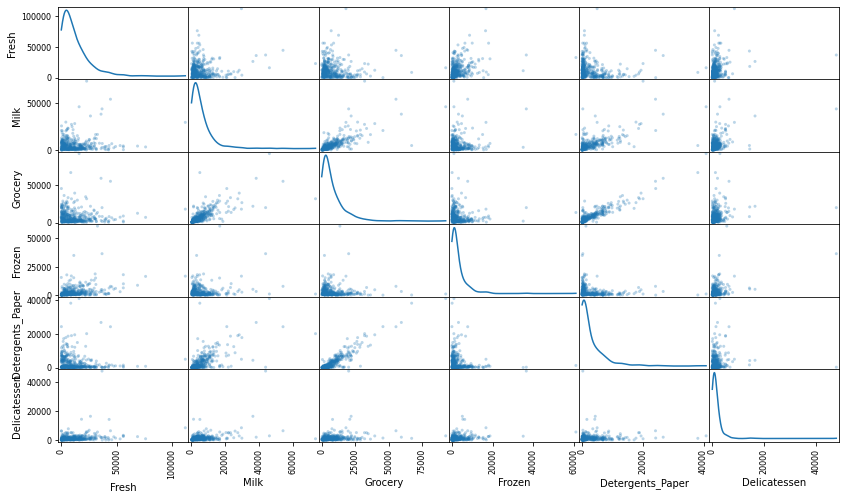

In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

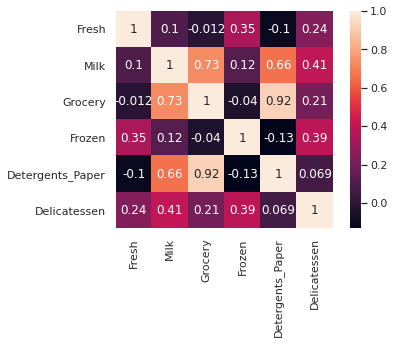

In [ ]:
import seaborn as sns; sns.set_theme()

corr = data.corr()
ax = sns.heatmap(corr, square=True, annot=True)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

從上圖(heatmap)中可以發現，Grocery 和 Detergents_Paper這兩者特徵的關聯性很高，約0.92，Grocery和Milk之間以及 Detergents_Paper和Milk之間分別為0.73和0.66，代表彼此之間也有一定的關聯性，這證實了在上題中預測得到的結果，Grocery可以透過其他特徵預測而得。從圖中可以發現數據不是常態分布，大多數據聚集於左下角，屬於正偏態分布。

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data(see explanatitons [here](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics)). One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.


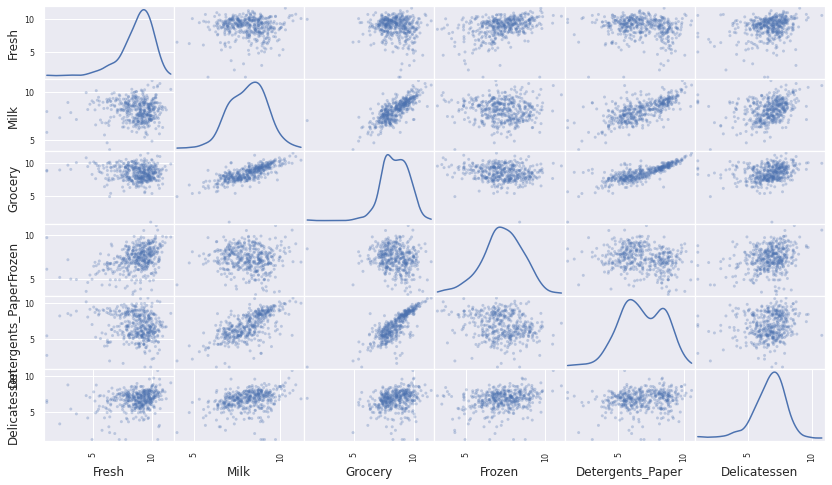

In [ ]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`. Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [ ]:
# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
1,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
2,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://en.wikipedia.org/wiki/Tukey%27s_range_test): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` (see [doc](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.percentile.html) here) for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [ ]:
# For each feature find the data points with extreme high or low values
outlier_index = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_index += log_data[~((log_data[feature] <= Q3 + step) & (log_data[feature] >= Q1 - step))].index.tolist()
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(set([i for i in outlier_index if outlier_index.count(i) > 1]))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print("outlier:")
display(log_data.iloc[list(set([i for i in outlier_index if outlier_index.count(i) > 1]))])

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


outlier:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

經過整理可以發現128同時在Fresh和Delicatessen 中被認為是outlier ，65同時在Fresh和Frozen中被認為是outlier ，66同時在Fresh和Delicatessen 中被認為是outlier ，75同時在Grocery 和 Detergents_Paper 中被認為是outlier ，154同時在Milk、Grocery和 Delicatessen 中被認為是outlier 。我認為應該從數據集中刪除這些數據，由於這些數據同時對於兩個以上的feature來說是outlier，因此若將這些outlier加入進行訓練模型，很可能會影響到模型的訓練成果，造成預測能力降低。並且outlier對k-means的影響很大，k-means會將每一個點分類到離自己最近的群集中心，並計算個資料到群集中心點得距離平方，再重新計算各組的群集中心，期望得到最小的組內平方和，因此outlier會對計算群集中心造成影響，使群集中心偏離。

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import the PCA function in `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

 The usage of PCA in sci-kit learn can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

To help you visulize PCA results, here we provide you a helper function.

In [ ]:
def display_pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

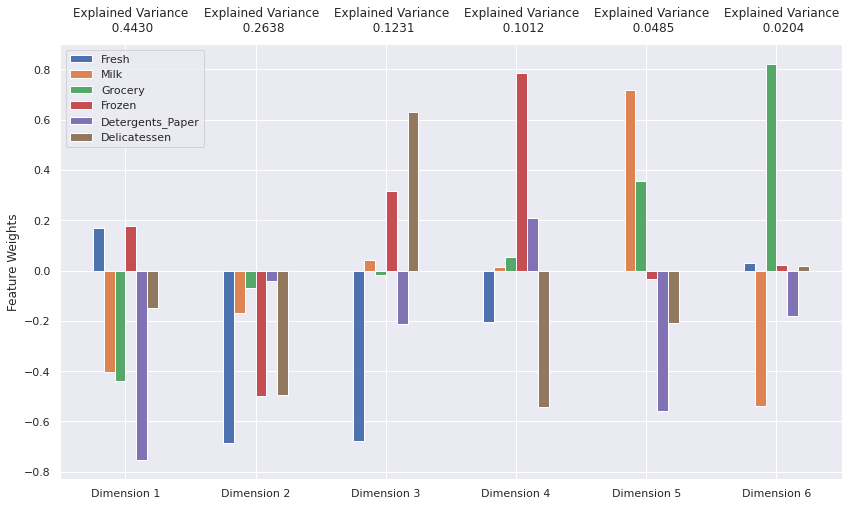

In [ ]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = display_pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

第一和第二 principal component總共被解釋之variance in data為0.7068約70.68% ，前四 principal component總共被解釋variance in data為0.9311約93.11% 。

Dimension 1 : Fresh和Frozen為正的feature weights，但大約為0.18左右，而Milk、Grocery、Detergents_Paper和	Delicatessen為負的feature weights，其中Delicatessen約為-0.18，Milk約為-0.4，Grocery約為-0.42，Detergents_Paper約為-0.76，代表Milk、Grocery、Detergents_Paper的降低與Dimension 1的增加具有相對應，並且這三者之間的特徵為正相關，可以推測為日常用品零售。

Dimension 2 : 所有feature weights皆為負的，其中Fresh、Frozen、Delicatessen這三者的feature weights最大，並且這三者之間的特徵為正相關，代表顧客支出與食品較有關連，可以推測為市場、餐廳等等。

Dimension 3 : Delicatessen和Fresh的feature weights為最高的，分別約為0.62和-0.67，但這兩者之間的特徵為負相關，Delicatessen的增加和Fresh的降低有關，代表當Delicatessen需求較高時，其Fresh需求就會降低，可以推測為熟食店或新鮮食品店。

Dimension 4 :Frozen的feature weights為最高的，約為0.79左右，而Delicateseen約為-0.56，這兩者之間的特徵為負相關，而Fresh和Detergents_Paper這兩者的feature weights差不多相同，約為0.2和-0.2，彼此之間也為負相關，其中Frozen佔較大feature weights，因此可以推測為冷凍商品販賣店。

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.7848,-2.3943,0.4798,-0.3483,-0.3191,0.0613
1,5.3491,1.2417,-2.9268,0.6380,0.0147,0.0342
2,-2.1528,5.3859,0.0930,0.4023,0.3577,0.3111


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [ ]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=5)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [ ]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.7848,-2.3943
1,5.3491,1.2417
2,-2.1528,5.3859


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [ ]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)
    plt.show()
    return ax

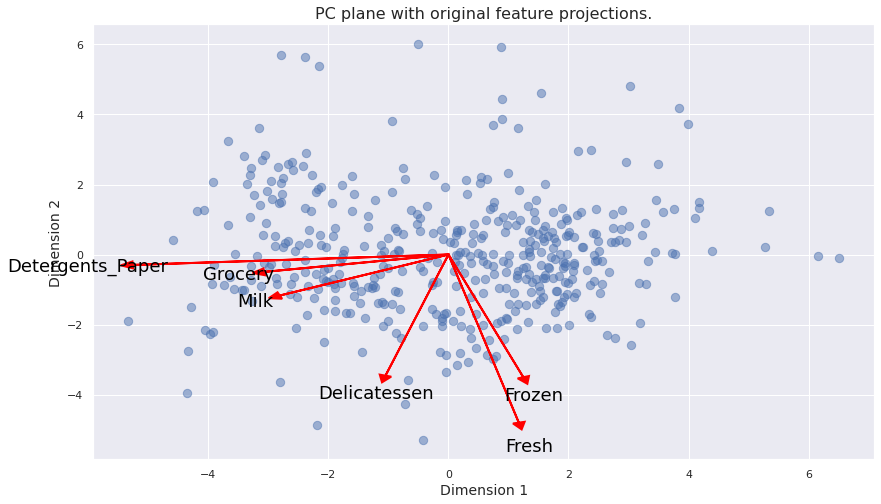

In [ ]:
# Create a biplot
biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**

Delicatessen、Fresh和Frozen are most strongly correlated with the first component，Detergent_Paper、Grocery和Milk are associated with the second component，其觀察結果與之前所獲得的pca_results plot一致。

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

K-Means的優勢在於速度非常快，複雜度低(O(n))，且原理簡單容易實現，最後一定會收斂，屬於hard clustering。

Gaussian Mixture Model演算法與K－Means相似，但導入機率的概念，不像K－Means會將資料歸類到對應的群集之中只有一種分類結果，即使某個資料距離群集中心非常遠，仍有很低的機率值，並且cluster可以呈现任何椭圆形状，而不被限制為圆形，屬於soft clustering。

我會選用K-Means，由於我們可以大致透過顧客資料中各feature之間的關係分析出屬於哪種類型的企業，並且實際嘗試過兩種演算法，可以發現在cluster為2時，K-Means得到的score較GMM來的高一些。

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Import a clustering method (e.g. [kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) or [GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html))
 - Fit that clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer_K = KMeans(n_clusters=2, random_state=3)
clusterer_G = GaussianMixture(n_components=2, random_state=3)

clusterer_K.fit(reduced_data)
clusterer_G.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds_K = clusterer_K.predict(reduced_data)
preds_G = clusterer_G.predict(reduced_data)

# TODO: Find the cluster centers
centers_K = clusterer_K.cluster_centers_
centers_G = clusterer_G.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds_K = clusterer_K.predict(pca_samples)
sample_preds_G = clusterer_G.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_K = silhouette_score(reduced_data, preds_K)
score_G = silhouette_score(reduced_data, preds_G)

print('score_K: ',score_K)
print('score_G: ',score_G)

score_K:  0.42628101546910835
score_G:  0.4219168464626149


In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
for num in range(2,5):
  clusterer_K = KMeans(n_clusters=num, random_state=3)
  clusterer_G = GaussianMixture(n_components=num, random_state=3)

  clusterer_K.fit(reduced_data)
  clusterer_G.fit(reduced_data)

  # TODO: Predict the cluster for each data point
  preds_K = clusterer_K.predict(reduced_data)
  preds_G = clusterer_G.predict(reduced_data)

  # TODO: Find the cluster centers
  centers_K = clusterer_K.cluster_centers_
  centers_G = clusterer_G.means_

  # TODO: Predict the cluster for each transformed sample data point
  sample_preds_K = clusterer_K.predict(pca_samples)
  sample_preds_G = clusterer_G.predict(pca_samples)

  # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
  score_K = silhouette_score(reduced_data, preds_K)
  score_G = silhouette_score(reduced_data, preds_G)

  print(num,' score_K: ',score_K)
  print(num,' score_G: ',score_G)

2  score_K:  0.42628101546910835
2  score_G:  0.4219168464626149
3  score_K:  0.3933369810495143
3  score_G:  0.37553218893793083
4  score_K:  0.3317812769983485
4  score_G:  0.28762713951391866


### Question 7

* Report the silhouette score for several cluster numbers you tried. For example, you can try to run your clustering algorithm with 2~4 clusters
* Of these, which number of clusters has the best silhouette score?

**Answer:**

cluster=2時，K-Means之score為0.4263而Gaussian Mixture Model之score為0.4219。

cluster=3時，K-Means之score為0.3933而Gaussian Mixture Model之score為0.3755。

cluster=4時，K-Means之score為0.3318而Gaussian Mixture Model之score為0.2876。

可以得知在cluster為2時，所得到的silhouette score最好。

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In the below, we also provide you a helper function to achieve this.

In [ ]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30)

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200)
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100)

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x')

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - \
    Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=3)

clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)


# TODO: Find the cluster centers
centers = clusterer.cluster_centers_


# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_K = silhouette_score(reduced_data, preds)


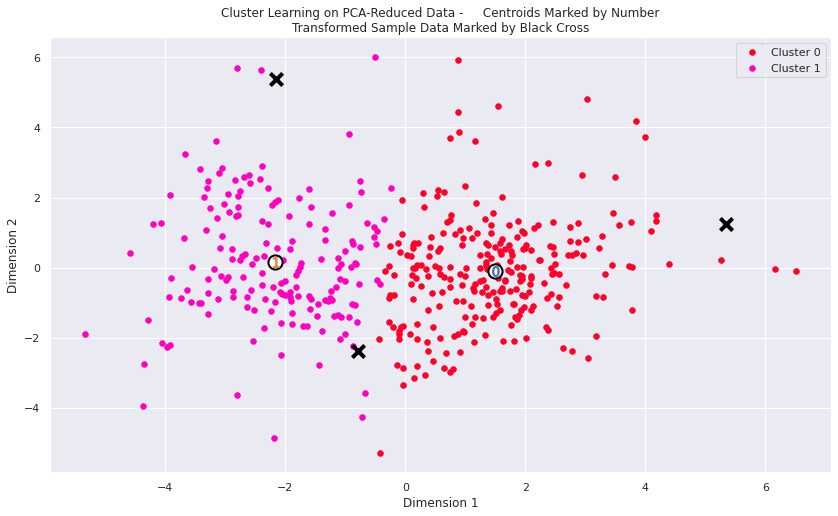

In [ ]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [ ]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

**Answer:**

Segment 0中的每個feature都小於該平均值，但其中Fresh遠遠高於其他feature，再來是Grocery、Frozen、Milk、Delicatessen，而Detergents_Paper為六種feature中最低的，因此可以判斷Cluster 0的顧客是從事餐飲企業。

Segment 1中的Milk、Grocery、Detergents_Paper都高於平均值介於75%與max之間，在其他feature上也有不少的需求，其Fresh、Frozen介於25%與50%之間，而Delicatessen介於50%與75%之間，因此可以判斷Cluster 1的顧客是從事大型超市或是零售商。

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

一開始的預測:
顧客4，推斷為大型批發零售商。
顧客289，推斷為新鮮食品販售市場。
顧客412，推斷為咖啡館。

現在的預測:
顧客4，預測為Cluster 1，屬於超市或零售商。
顧客289，預測為Cluster 0，屬於餐飲企業。
顧客412，預測為Cluster 1，屬於超市或零售商。

其中第一位和第二位顧客預測結果的方向相似，但第三位顧客的預測結果不符合先前的預測結果。

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

我們不能假設這個改變對所有顧客造成的影響是一致的，因為每個顧客的需求不同，若該顧客在Fresh和Milk的需求上較大，而Fresh和Milk又是屬於有時效性不能擺放許久的，則會因這個改變而受到很大的影響，但若顧客在Grocery、Detergents_Paper、Delicatessen上有較大的需求，由於這些都是屬於可以放置較久的，因此較不會受到配送服務時間的改變而有太大的影響。而Cluster 0對於Fresh有較大的需求，因此應從Cluster 1中挑選客戶進行A/B tests。


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

可以使用已有的顧客數據進行訓練監督式學習之模型，適用於二分類問題，並使用分類器為新的10個顧客進行分類，其target variable為該顧客是屬於Cluster 0還是Cluster 1，當顧客在Milk、Grocery、Detergents_Paper這三者上需求很高時，則應推斷屬於第一類別，並可使用較低頻率的配送時間，而當顧客在Fresh、Frozen上有較大需求者則應推斷屬於第二類別，並需使用原先一週五天的配送時間。

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

>Note: you have to change the file location in the `channel_results()` function

In [ ]:
def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("/content/gdrive/My Drive/customers.csv")
	except:
	    print("Dataset could not be loaded. Is the file missing?")       
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

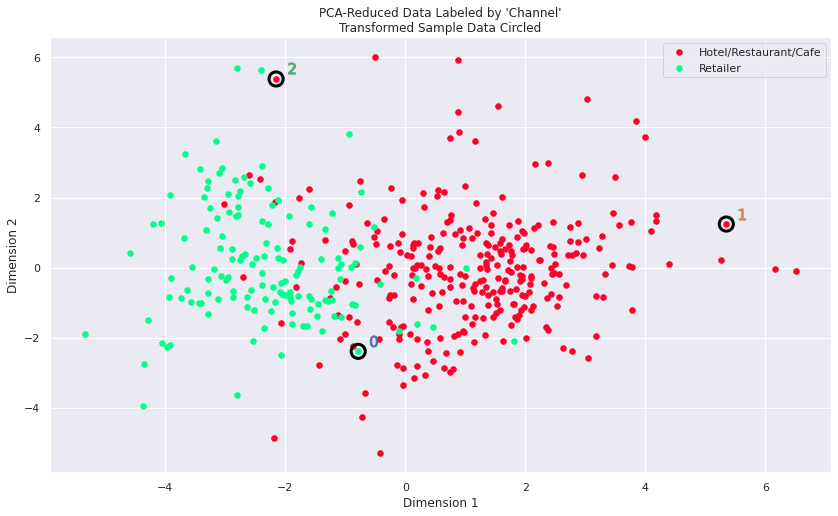

In [ ]:
# Display the clustering results based on 'Channel' data
channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

根據underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers，可以將資料分為兩個cluster，與我在先前選擇的cluster數相同。使用K-means演算法將顧客分為cluster 0和cluster 1，分別代表'Retailers'和'Hotels/Restaurants/Cafes'，大部分的分類結果皆為正確的，但從資料分布中可以發現兩種類別有許多重疊的資料，在K-means進行分類上會將資料分類給更靠近的群集中心，因此沒有將所有資料都進行正確的分類，但這些分類與之前對 customer segments的定義為一致的。

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. Submit the HTML file.